# Understanding Descriptive Statistics

Import the necessary libraries here:

In [131]:
# Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [16]:
# your code here
rolls = 10 #number of times you roll the dice (n)
omega = {1,2,3,4,5,6} #set of all possible outcomes, don't really need it here

event_space = [] #collected outcomes that occur in the simulation

for i in range(rolls):
    event = np.random.randint(1,7)
    event_space.append(event)

df_dice = pd.DataFrame(event_space, columns=["outcomes"])
print(df_dice)

   outcomes
0         2
1         3
2         5
3         3
4         6
5         1
6         1
7         1
8         3
9         1


#### 2.- Plot the results sorted by value.

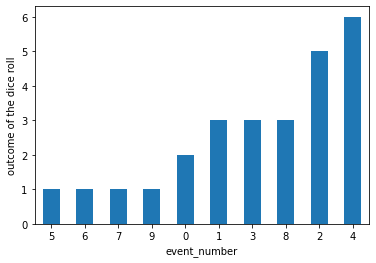

In [17]:
df_sorted = df_dice["outcomes"].sort_values()
df_sorted.plot(kind="bar", rot=0)
plt.xlabel("event_number")
plt.ylabel("outcome of the dice roll")
plt.show();

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

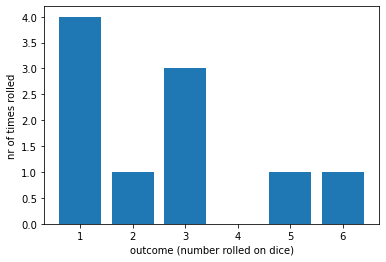

In [18]:
# print(df_dice)
sort = df_dice["outcomes"].value_counts().sort_index()
# print(sort)
plt.bar(height=sort, x=sort.index)
plt.xlabel("outcome (number rolled on dice)")
plt.ylabel("nr of times rolled")
plt.show();


In [19]:
"""
First one doesnt really make sense to me (had to peek in the answers to see what they ment as I sorted by value first time around). 
Second one shows how often a certain number is rolled (how often an event occurred)
"""

'\nFirst one doesnt really make sense to me (had to peek in the answers to see what they ment as I sorted by value first time around). \nSecond one shows how often a certain number is rolled (how often an event occurred)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
def mean_dice(event_space):
    """
    input: list of observations (events)
    output: mean (as float)
    
    """
    mean = sum(event_space)/len(event_space)
    return mean 

mean_dice(event_space)


2.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [21]:
# your code here
freq_distr = sort.reset_index()
# print(freq_distr)
mean_2 = sum(freq_distr["outcomes"]*freq_distr["index"])/rolls
mean_2

2.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [24]:
def median_dice(event_space):
    """
    input: list of observations (events)
    output: median value of list
    """
    if len(event_space) %2 == 0:
        median_loc1 = int(len(df_sorted)/2) #int() cuts value off : 0.9 becomes 0
        median_loc2 = median_loc1 - 1 #change from length (start at 1) to index (start at 0), so -1 instead of + 1
        median_dice1 = df_sorted.iloc[median_loc1]
        median_dice2 = df_sorted.iloc[median_loc2]
        median_dice = (median_dice1+median_dice2)/2
        return median_dice
    else:
        median_loc = int((len(event_space)/2)) #again, from len (eg 7) to median index: int(3.5) becomes 3 (is what you need)
        median_dice = df_sorted.iloc[median_loc]
        return median_dice

median_dice(event_space)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [31]:
# your code here
def quartiles(event_space, df_sorted):
    """
    input: event_space, dataframe sorted by value
    output: the four quartiles of the data
    """
    Q2 = median_dice(event_space)
    Q4 = max(event_space)
    
    if len(event_space) %2 == 0:
        Q1_loc1 = int (len(event_space) * 0.25) #if len =8, Q1_loc1 is at index 8*0.25=2
        Q1_loc2 = Q1_loc1 + 1 #if len = 8, Q1_loc2 is at index Q1_loc1+1= 3
        Q1 = (df_sorted.iloc[Q1_loc1] + df_sorted.iloc[Q1_loc2])/2
        Q3_loc1 = -1 * (Q1_loc1) # if len = 8, Q3_loc1 is at index -2
        Q3_loc2 = Q3_loc1 - 1 # at if len = 8, Q3_loc2 is at index -3
        Q3 = (df_sorted.iloc[Q3_loc1] + df_sorted.iloc[Q3_loc2])/2    
    else:
        Q1_loc = int(len(event_space) * 0.25) #if len = 7;  7*0.25 = 1.xxx (index of median is at index 1). 
        Q3_loc = -1 * (Q1_loc + 1) #start counting at the back, now -1 is the first, so need +1
        Q1 = df_sorted.iloc[Q1_loc]
        Q3 = df_sorted.iloc[Q3_loc]          
    return Q1, Q2, Q3, Q4
    

In [32]:
quartiles(event_space, df_sorted)

(1.0, 2.5, 4.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [34]:
# your code here
df = pd.read_csv("../data/roll_the_dice_hundred.csv")
df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


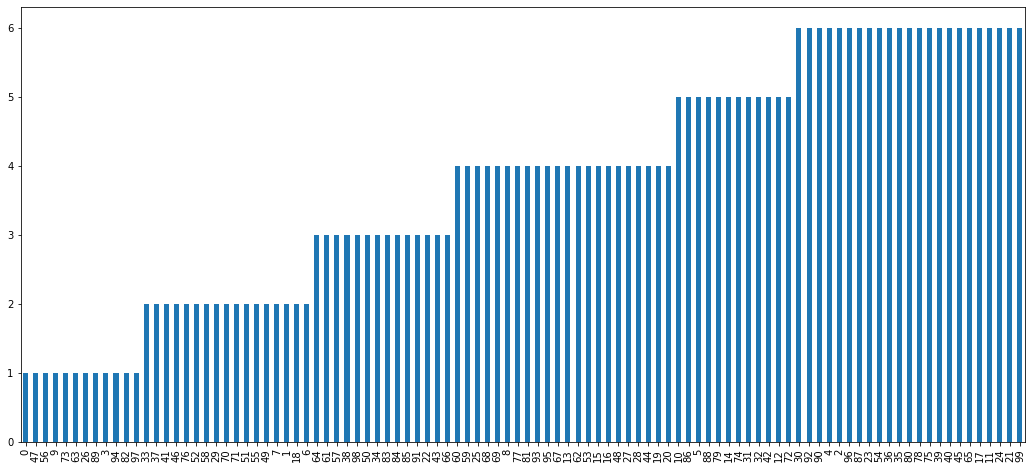

In [72]:
df_sort = df.sort_values(by="value", ascending= True)

df_sort["value"].plot(kind="bar", x="roll", y="value", rot=90, figsize=(18,8))
plt.show();

In [ ]:
"""
I see how often each number is rolled. Not all numbers are rolled as often, 4 and 6 are rolled most often, 1 and 5 least often
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [51]:
def mean_dice(df, column_name):
    """
    input: dataframe and columnname with the list of observations (use " " around the name!)
    output: mean (as float)
    
    """
    mean = sum(df[column_name])/len(df)
    return mean 

mean_dice(df, "value")

3.74

#### 3.- Now, calculate the frequency distribution.


In [59]:
df.groupby("value").count().reset_index()

,value,Unnamed: 0,roll
0,1,12,12
1,2,17,17
2,3,14,14
3,4,22,22
4,5,12,12
5,6,23,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

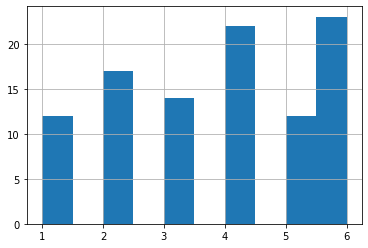

In [43]:
df["value"].hist()

In [ ]:
"""
it's difficult to estimate the mean value by looking at the histogram. The histogram mainly shows how often a number is rolled. 
"""

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
 the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [73]:
df = pd.read_csv("../data/roll_the_dice_thousand.csv")
df.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


<AxesSubplot:>

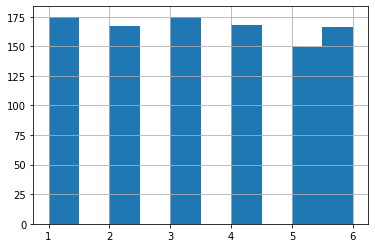

In [74]:
df["value"].hist()

In [ ]:
"""
The numbers are more evenly rolled. which makes sense: the chance for each number should be the same (if the dice is not rigged)

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from the `data` folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [75]:
# your code here
df1 = pd.read_csv("../data/ages_population.csv")
df1.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


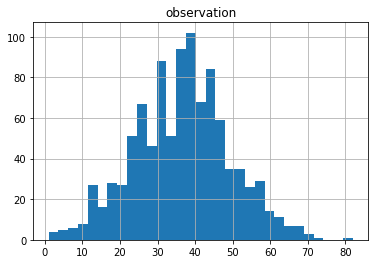

In [98]:
df1_sorted = df1.sort_values(by = "observation", ascending = True)
df1_sorted.tail(25)

nr_bins = int(np.sqrt(len(df1)))
df1_sorted.hist(bins=nr_bins)
plt.show();

In [ ]:
"""
est. mean: 35-40
est. stdev: ~15

"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [91]:
# your code here
print(df1["observation"].mean())
print(df1["observation"].std())

36.56
12.816499625976762


In [ ]:
"""
not too bad. Est stdev is a bit off
"""

#### 3.- Now read the file `ages_population2.csv` 
from the `data` folder and load it.  Calculate the frequency distribution and plot it.

In [92]:
df2 = pd.read_csv("../data/ages_population2.csv")
df2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


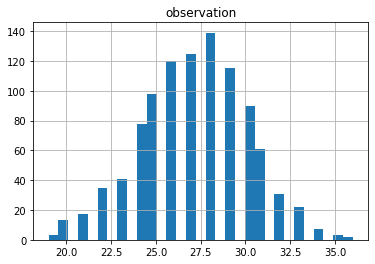

In [102]:
nr_bins = int(np.sqrt(len(df1)))
df2.hist(bins=nr_bins)
plt.show();

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
There are gaps.. and way younger people (barely any people over 35)
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [103]:
print(df2.mean())
print(df2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
younger population. student area maybe?
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from the `data` folder. Calculate the frequency distribution and plot it.

In [104]:
df3 = pd.read_csv("../data/ages_population3.csv")
df3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


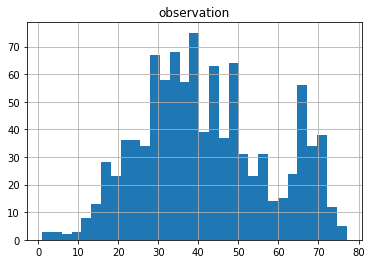

In [105]:
nr_bins = int(np.sqrt(len(df1)))
df3.hist(bins=nr_bins)
plt.show();

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [108]:
print("mean:", df3["observation"].mean(), "stdev:", df3["observation"].std())

mean: 41.989 stdev: 16.144705959865934


In [ ]:
"""
data is less normaly distributed: there are 2 peaks, one around 38, one around 65. STD increased quite a bit
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [130]:
df3_sorted.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
mean is 41.9
median is 40
difference of 1.9, which tells you the data is not normally distributed (in that case median = mean)
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [161]:
df1["neigbourhood"] = "neighbourhood_1"
df2["neigbourhood"] = "neighbourhood_2"
df3["neigbourhood"] = "neighbourhood_3"

,observation,neigbourhood
0,68.0,neighbourhood_1
1,12.0,neighbourhood_1
2,45.0,neighbourhood_1
3,38.0,neighbourhood_1
4,49.0,neighbourhood_1


In [164]:
df_all = pd.concat([df1,df2,df3])

,observation,neigbourhood
995,16.0,neighbourhood_3
996,55.0,neighbourhood_3
997,30.0,neighbourhood_3
998,35.0,neighbourhood_3
999,43.0,neighbourhood_3


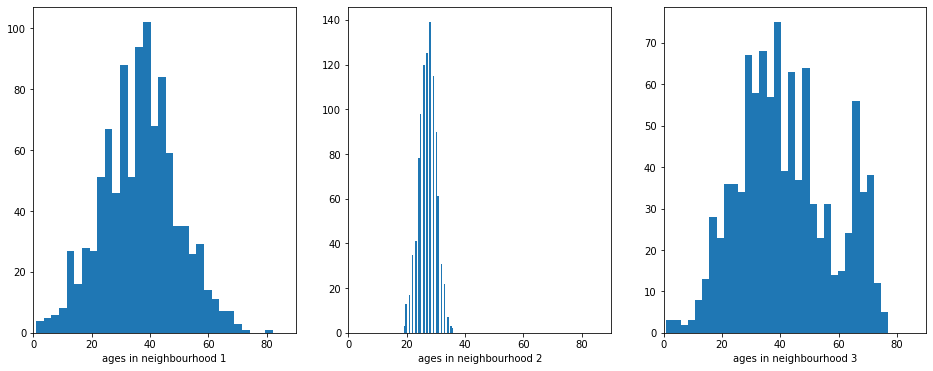

In [211]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

ax[0].hist(data = df1, x = "observation", bins=int(np.sqrt(len(df1))))
ax[0].set_xlabel("ages in neighbourhood 1")
ax[1].hist(data = df2, x = "observation", bins=int(np.sqrt(len(df2))))
ax[1].set_xlabel("ages in neighbourhood 2")
ax[2].hist(data = df3, x = "observation", bins=int(np.sqrt(len(df3))))
ax[2].set_xlabel("ages in neighbourhood 3")
plt.setp(ax, xlim=[0,90])
plt.show();

the age distribution in the different neighbourhoods is quite different.. 

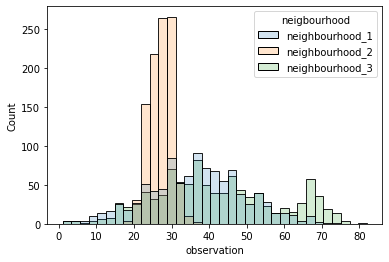

In [180]:
sns.histplot(x="observation", hue="neigbourhood", data=df_all, alpha=0.2)
plt.show();


they do have overlap, esp 1 and 3 are similar, except for more elderly (60+) in 3. 

In [206]:
df_all.groupby("neigbourhood").describe().transpose()

neigbourhood       neighbourhood_1  neighbourhood_2  neighbourhood_3
observation count        1000.0000      1000.000000      1000.000000
            mean           36.5600        27.155000        41.989000
            std            12.8165         2.969814        16.144706
            min             1.0000        19.000000         1.000000
            25%            28.0000        25.000000        30.000000
            50%            37.0000        27.000000        40.000000
            75%            45.0000        29.000000        53.000000
            max            82.0000        36.000000        77.000000

nbh 1 and 3 have bigger stdevs --> more variation around the mean (wider curves), while nbh 2 is less wide.
in nbh 1 75% of inhabitants are between 1 and 45
in nbh 2 75% of inhabitants are between 1 and 53
in nbh 3 75% of inhabitants are between 19 and 29